In [17]:
import pandas as pd
df = pd.read_csv('mnist/emnist_digits_train.csv')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239999 entries, 0 to 239998
Columns: 785 entries, 8 to 0.0.520
dtypes: float64(784), int64(1)
memory usage: 1.4 GB


In [19]:
df.head()

,8,0.0,0.0.1,0.0.2,0.0.3,0.0.4,0.0.5,0.0.6,0.0.7,0.0.8,...,0.0.511,0.0.512,0.0.513,0.0.514,0.0.515,0.0.516,0.0.517,0.0.518,0.0.519,0.0.520
0,9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


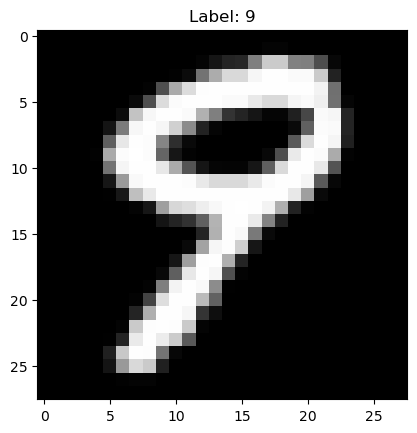

In [21]:
labels = df.iloc[:, 0].values
images = df.iloc[:, 1:].values
import matplotlib.pyplot as plt
plt.imshow(images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

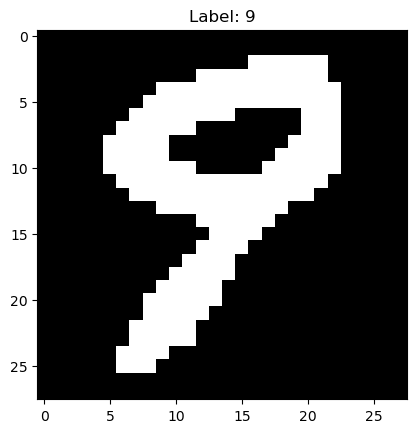

In [24]:
threshold = 0.2
binary_images = (images > threshold).astype(int)

plt.imshow(binary_images[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[0]}")
plt.show()

In [11]:
import os
import numpy as np
import pandas as pd
import csv
current_dir = os.getcwd()

DATA_DIR = os.path.join(current_dir, "mnist")
OUTPUT_DIR = os.path.join(os.path.dirname(current_dir), "backend", "parameters")

In [12]:
print(DATA_DIR)
print(OUTPUT_DIR)

/Users/an/Data_Engineering/projects/ml_from_scatch/model/mnist
/Users/an/Data_Engineering/projects/ml_from_scatch/backend/parameters


In [13]:
def load_mnist_csv(path):
    df = pd.read_csv(path)
    labels = df.iloc[:, 0].values
    images = df.iloc[:, 1:].values
    return images, labels

def softmax(z):
    exp_z = np.exp(z - np.max(z, axis=1, keepdims=True))
    return exp_z / np.sum(exp_z, axis=1, keepdims=True)

def one_hot_encode(labels, num_classes=10):
    return np.eye(num_classes)[labels]

def train(X, y, epochs=50, lr=0.1, batch_size=64):
    num_samples, num_features = X.shape
    num_classes = 10
    # Initialize weights randomly
    W = np.random.randn(num_features, num_classes) * 0.01
    b = np.zeros(num_classes)
    y_one_hot = one_hot_encode(y, num_classes)

    for epoch in range(epochs):
        # Shuffle data
        perm = np.random.permutation(num_samples)
        X_shuffled = X[perm]
        y_shuffled = y_one_hot[perm]

        for i in range(0, num_samples, batch_size):
            X_batch = X_shuffled[i:i+batch_size]
            y_batch = y_shuffled[i:i+batch_size]

            scores = np.dot(X_batch, W) + b
            probs = softmax(scores)

            error = probs - y_batch
            dW = np.dot(X_batch.T, error) / X_batch.shape[0]
            db = np.mean(error, axis=0)

            W -= lr * dW
            b -= lr * db

        if (epoch + 1) % 10 == 0:
            # Compute loss on full data for logging
            scores_full = np.dot(X, W) + b
            probs_full = softmax(scores_full)
            loss = -np.sum(y_one_hot * np.log(probs_full + 1e-9)) / num_samples
            print(f"Epoch {epoch+1}, Loss: {loss:.4f}")

    return W, b

def predict(X, W, b):
    scores = np.dot(X, W) + b
    return np.argmax(scores, axis=1)

def save_model_no_numpy(W, b):
    with open(os.path.join(OUTPUT_DIR,"mnist_model_weights.csv"), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerows(W)
    with open(os.path.join(OUTPUT_DIR,"mnist_model_biases.csv"), "w", newline="") as f:
        writer = csv.writer(f)
        writer.writerow(b)


In [14]:
train_images, train_labels = load_mnist_csv(os.path.join(DATA_DIR, "mnist_train.csv"))
test_images, test_labels = load_mnist_csv(os.path.join(DATA_DIR, "mnist_test.csv"))

In [15]:
threshold = 51
X_train = (train_images > threshold).astype(int)
y_train = train_labels.astype(np.int64)

X_test = (test_images > threshold).astype(int)
y_test = test_labels.astype(np.int64)

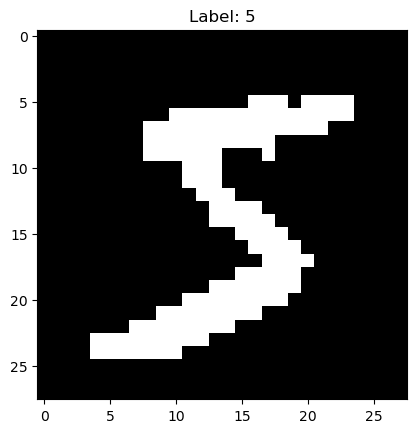

In [16]:
plt.imshow(X_train[0].reshape(28, 28), cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

In [17]:
print("Start training...")
W, b = train(X_train, y_train, epochs=100, lr=0.1)

print("Evaluating on test set...")
y_pred = predict(X_test, W, b)
accuracy = np.mean(y_pred == y_test)
print(f"Test Accuracy: {accuracy * 100:.2f}%")


save_model_no_numpy(W, b)

Start training...
Epoch 10, Loss: 0.2667
Epoch 20, Loss: 0.2543
Epoch 30, Loss: 0.2471
Epoch 40, Loss: 0.2437
Epoch 50, Loss: 0.2443
Epoch 60, Loss: 0.2401
Epoch 70, Loss: 0.2398
Epoch 80, Loss: 0.2361
Epoch 90, Loss: 0.2355
Epoch 100, Loss: 0.2364
Evaluating on test set...
Test Accuracy: 91.71%


In [13]:
import torchvision
from torchvision import transforms
from torch.utils.data import DataLoader
from PIL import Image

transform = transforms.Compose([
    transforms.Lambda(lambda img: img.rotate(-90).transpose(method=Image.FLIP_LEFT_RIGHT)),
    transforms.ToTensor(),
])

emnist_train = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=True,
    download=True,
    transform=transform
)

emnist_test = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=False,
    download=True,
    transform=transform
)

train_loader = DataLoader(emnist_train, batch_size=64, shuffle=True)
test_loader = DataLoader(emnist_test, batch_size=64, shuffle=False)


images, labels = next(iter(train_loader))
print(f"Image shape: {images[0].shape}, Label: {labels[0]}")


Image shape: torch.Size([1, 28, 28]), Label: 4


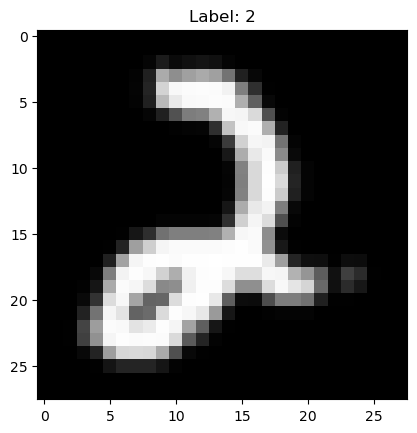

In [15]:
import matplotlib.pyplot as plt
plt.imshow(images[5].reshape(28, 28), cmap='gray')
plt.title(f"Label: {labels[5]}")
plt.show()

In [16]:
import torchvision
from torchvision import transforms
from PIL import Image
import csv
import numpy as np

transform = transforms.Compose([
    transforms.Lambda(lambda img: img.rotate(-90).transpose(method=Image.FLIP_LEFT_RIGHT)),
    transforms.ToTensor(),
])

def dataset_to_csv(dataset, filename):
    with open(filename, mode='w', newline='') as f:
        writer = csv.writer(f)
        for i in range(len(dataset)):
            img, label = dataset[i]
            img_np = img.numpy().reshape(-1)
            row = [label] + img_np.tolist()
            writer.writerow(row)
            if i % 10000 == 0:
                print(f"Processed {i} samples")

# Load datasets
emnist_train = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=True,
    download=True,
    transform=transform
)

emnist_test = torchvision.datasets.EMNIST(
    root='./data',
    split='digits',
    train=False,
    download=True,
    transform=transform
)

# Convert and save to CSV
print("Saving train set...")
dataset_to_csv(emnist_train, 'emnist_digits_train.csv')

print("Saving test set...")
dataset_to_csv(emnist_test, 'emnist_digits_test.csv')

print("Done!")


Saving train set...
Processed 0 samples
Processed 10000 samples
Processed 20000 samples
Processed 30000 samples
Processed 40000 samples
Processed 50000 samples
Processed 60000 samples
Processed 70000 samples
Processed 80000 samples
Processed 90000 samples
Processed 100000 samples
Processed 110000 samples
Processed 120000 samples
Processed 130000 samples
Processed 140000 samples
Processed 150000 samples
Processed 160000 samples
Processed 170000 samples
Processed 180000 samples
Processed 190000 samples
Processed 200000 samples
Processed 210000 samples
Processed 220000 samples
Processed 230000 samples
Saving test set...
Processed 0 samples
Processed 10000 samples
Processed 20000 samples
Processed 30000 samples
Done!
